In [6]:
import numpy as np
from scipy.signal import butter, lfilter, freqz
from scipy.io import wavfile
import matplotlib.pyplot as plt

In [51]:
sampleRate, data = scipy.io.wavfile.read("1gimjLEgqBdoHReixdq8HlEBfEr20.wav")

In [8]:
def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y

In [9]:
order = 6
fs = 48.0       # sample rate, Hz
cutoff = 3.667  # desired cutoff frequency of the filter, Hz

In [10]:
# Get the filter coefficients so we can check its frequency response.
b, a = butter_lowpass(cutoff, fs, order)

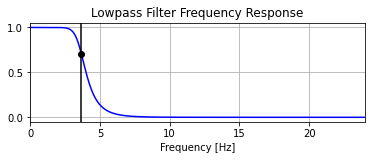

In [11]:
# Plot the frequency response.
w, h = freqz(b, a, worN=8000)
plt.subplot(2, 1, 1)
plt.plot(0.5*fs*w/np.pi, np.abs(h), 'b')
plt.plot(cutoff, 0.5*np.sqrt(2), 'ko')
plt.axvline(cutoff, color='k')
plt.xlim(0, 0.5*fs)
plt.title("Lowpass Filter Frequency Response")
plt.xlabel('Frequency [Hz]')
plt.grid()

In [49]:
t = np.arange(len(data))/sampleRate

In [38]:
y = butter_lowpass_filter(data, cutoff, fs, order)

ValueError: x and y must have same first dimension, but have shapes (800640,) and (143360,)

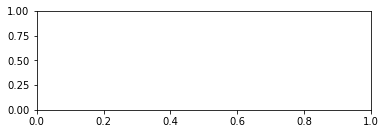

In [52]:
plt.subplot(2, 1, 2)
plt.plot(t, data, 'b-', label='data')
plt.plot(t, y, 'g-', linewidth=2, label='filtered data')
plt.xlabel('Time [sec]')
plt.grid()
plt.legend()

plt.subplots_adjust(hspace=0.35)
plt.show()

In [45]:
# read ECG data from the WAV file
sampleRate, data = scipy.io.wavfile.read('COPD1.wav')
times = np.arange(len(data))/sampleRate

# apply a 3-pole lowpass filter at 0.1x Nyquist frequency
b, a = scipy.signal.butter(3, 0.1)
filtered = scipy.signal.filtfilt(b, a, np.sin(data))

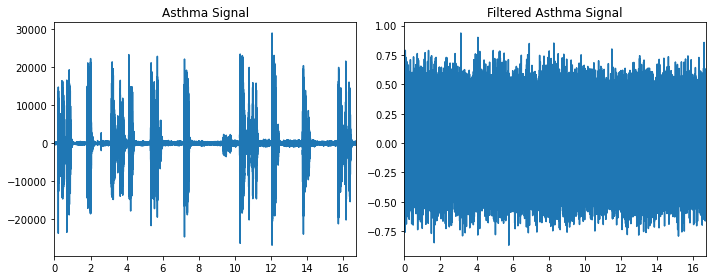

In [46]:
plt.figure(figsize=(10, 4))

plt.subplot(121)
plt.plot(times, data)
plt.title("Asthma Signal")
plt.margins(0, .05)

plt.subplot(122)
plt.plot(times, filtered)
plt.title("Filtered Asthma Signal")
plt.margins(0, .05)

plt.tight_layout()
plt.show()